<a href="https://colab.research.google.com/github/danielapavas/Labs-IA/blob/main/content/LAB%2005.02%20-%20MODEL%20EVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 05.02 - Model evaluation

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [90]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as daniela.pavas1@udea.edu.co... please wait
using course session ai4eng.v1.udea.r2::2023.1
success!! you are logged in


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [3]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 21,  1, 91, 20],
       [ 2, 34, 19, 15, 43],
       [ 3, 90, 37, 46,  3],
       [ 4,  1, 43, 41, 39],
       [ 5, 88, 78, 24, 26],
       [ 6,  2, 94, 80, 83],
       [ 7,  9,  1, 16, 98],
       [ 8, 57, 11, 73, 42],
       [ 9, 33, 92, 85, 41],
       [10, 75, 48, 40,  0],
       [11, 35, 89, 94, 43],
       [12,  5, 27, 43, 99],
       [13, 62,  7, 87, 26],
       [14, 59, 79, 71, 51],
       [15, 10, 55, 13, 26],
       [16, 23, 72, 73, 38],
       [17, 45, 83, 50, 66],
       [18, 14, 13,  2, 50],
       [19, 74, 91, 68, 95]])

In [4]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2, 34, 19, 15, 43],
       [ 4,  1, 43, 41, 39],
       [ 5, 88, 78, 24, 26]])

In [5]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [21, 91],
       [34, 15],
       [90, 46],
       [ 1, 41],
       [88, 24],
       [ 2, 80],
       [ 9, 16],
       [57, 73],
       [33, 85],
       [75, 40],
       [35, 94],
       [ 5, 43],
       [62, 87],
       [59, 71],
       [10, 13],
       [23, 73],
       [45, 50],
       [14,  2],
       [74, 68]])

In [6]:
x[ridxs][:, cidxs]

array([[34, 15],
       [ 1, 41],
       [88, 24]])

and the dimensions of the array are accessible through `len` and `shape`

In [7]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [8]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 21,  1, 91, 20],
       [ 2, 34, 19, 15, 43]])

In [9]:
x[3:]

array([[ 3, 90, 37, 46,  3],
       [ 4,  1, 43, 41, 39],
       [ 5, 88, 78, 24, 26],
       [ 6,  2, 94, 80, 83],
       [ 7,  9,  1, 16, 98],
       [ 8, 57, 11, 73, 42],
       [ 9, 33, 92, 85, 41],
       [10, 75, 48, 40,  0],
       [11, 35, 89, 94, 43],
       [12,  5, 27, 43, 99],
       [13, 62,  7, 87, 26],
       [14, 59, 79, 71, 51],
       [15, 10, 55, 13, 26],
       [16, 23, 72, 73, 38],
       [17, 45, 83, 50, 66],
       [18, 14, 13,  2, 50],
       [19, 74, 91, 68, 95]])

we can do the same thing with vectors

In [10]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [11]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [12]:
np.random.permutation(v)

array([117, 107, 104, 112, 114, 102, 115, 105, 118, 100, 109, 110, 106,
       119, 116, 103, 111, 101, 113, 108])

or the first natural numbers

In [13]:
p = np.random.permutation(20)
p

array([ 7, 14,  4,  5, 11,  0,  2, 10,  8,  1, 13, 16, 17, 15,  6, 18,  3,
       12,  9, 19])

how do you interpret this?

In [16]:
v[p[5:]]

array([100, 102, 110, 108, 101, 113, 116, 117, 115, 106, 118, 103, 112,
       109, 119])

In [17]:
x[p[:5]]

array([[ 7,  9,  1, 16, 98],
       [14, 59, 79, 71, 51],
       [ 4,  1, 43, 41, 39],
       [ 5, 88, 78, 24, 26],
       [11, 35, 89, 94, 43]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct` 
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [18]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


**MI SOLUCIÓN**


In [36]:
def split_data(X, y, pct):
    assert len(X) == len(y), "X and y must have the same length"
    assert 0 < pct < 1, "pct must be in the (0,1) interval"

    # shuffle indices
    n = len(X)
    indices = np.random.permutation(n)

    # split indices
    n1_elements = int(n * pct)
    permutation_partition_1 = indices[:n1_elements]
    permutation_partition_2 = indices[n1_elements:]

    # create subsets
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]

    return X1, X2, y1, y2

check your solution manually with the following code

In [37]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 47  2  2 27 38 28 47]
 [ 2 77 88 61 79 35 29 73]
 [ 3 32 14 82 19 14 64 95]
 [ 4 36 14 31  0 93 76 21]
 [ 5  6 57 24 65  6 11 96]
 [ 6 76 32 74 68 24 39 52]
 [ 7 29  4 61 17 93 30 75]
 [ 8 26 67  8 57 29 81 57]
 [ 9 38 57 90 35 22 27 57]
 [10 65 52 59 67 69 35 74]
 [11 11 33 53 69  1 81 54]
 [12 64 50 21 54 97 50 62]
 [13 79 19 41 39 55 33 45]
 [14 18  2 86 85 72 91 38]
 [15 29 64  0 66 87 85 45]
 [16 58 63 36 82 39 50 92]
 [17  3 41 76 69  3 65 74]
 [18 33 93 14 38 58 92 84]
 [19  6 70 76 18 88 86 50]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [38]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [39]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(6789, 6789, 2190, 2190)

In [40]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[ 6 76 32 74 68 24 39 52]
 [ 1 47  2  2 27 38 28 47]
 [13 79 19 41 39 55 33 45]
 [ 7 29  4 61 17 93 30 75]
 [15 29 64  0 66 87 85 45]
 [ 8 26 67  8 57 29 81 57]
 [ 5  6 57 24 65  6 11 96]
 [ 2 77 88 61 79 35 29 73]
 [ 0  1  2  3  4  5  6  7]
 [18 33 93 14 38 58 92 84]
 [10 65 52 59 67 69 35 74]
 [ 3 32 14 82 19 14 64 95]
 [14 18  2 86 85 72 91 38]
 [19  6 70 76 18 88 86 50]] 
--
[[11 11 33 53 69  1 81 54]
 [17  3 41 76 69  3 65 74]
 [ 4 36 14 31  0 93 76 21]
 [16 58 63 36 82 39 50 92]
 [ 9 38 57 90 35 22 27 57]
 [12 64 50 21 54 97 50 62]] 
--
[106 101 113 107 115 108 105 102 100 118 110 103 114 119] 
--
[111 117 104 116 109 112] 
--


In [41]:
Xts

array([[11, 11, 33, 53, 69,  1, 81, 54],
       [17,  3, 41, 76, 69,  3, 65, 74],
       [ 4, 36, 14, 31,  0, 93, 76, 21],
       [16, 58, 63, 36, 82, 39, 50, 92],
       [ 9, 38, 57, 90, 35, 22, 27, 57],
       [12, 64, 50, 21, 54, 97, 50, 62]])

**submit your code**

In [42]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [43]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [45]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

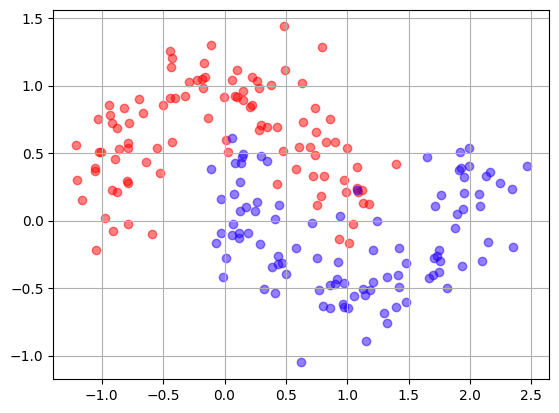

In [46]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.470575, 0.529425)

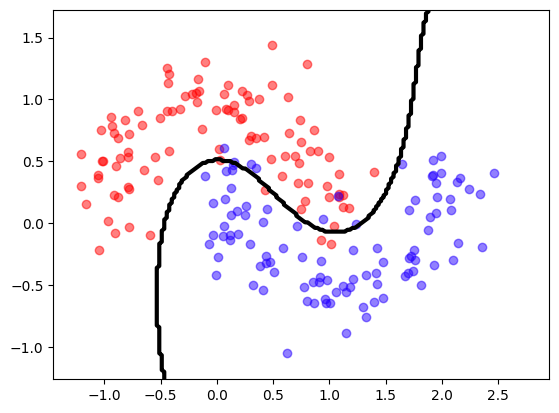

In [47]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [48]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

**MI SOLUCIÓN**

In [52]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"
    
    n_elements = len(X) // 2
    x1, y1 = X[:n_elements] , y[:n_elements]
    x2 = X[n_elements:]
    
    estimator.fit(x1, y1)
    predictions = estimator.predict(x2)    
    return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [53]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [54]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [55]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [56]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[3 4 4 7 8 8 0 9 7 8 9 6 9 1 1]


In [57]:
y_less_than_5 = y<5
print (y_less_than_5)

[ True  True  True False False False  True False False False False False
 False  True  True]


and how we can select elements of a vector using a boolean vector of the same length

In [58]:
y[y_less_than_5]

array([3, 4, 4, 0, 1, 1])

In [59]:
y[y<5]

array([3, 4, 4, 0, 1, 1])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [60]:
v = np.random.randint(20, size=15)
v

array([10, 19,  6, 17, 16,  5,  6, 15, 18,  0,  1, 19, 19,  6,  6])

In [61]:
v[y<5]

array([10, 19,  6,  6,  6,  6])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


**MI SOLUCÓN**

In [67]:
def select_per_class(X, y):
    X1 = X[y==0]
    X2 = X[y==1]
    return X1, X2

check manually your code

In [68]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [69]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [70]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


**MI SOLUCIÓN**

In [80]:
#accuracy que toma como entrada dos parámetros y_true y y_pred, y devuelve el resultado de np.mean(y_true == y_pred)
accuracy = lambda y_true, y_pred: np.mean(y_true == y_pred)

In [81]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

0.375

**submit your code**

In [79]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [87]:
def split_fit_predict(estimator, X, y, train_pct):
    
    def accuracy(y_true, y_pred):
        return np.mean(y_true == y_pred)

    n = int(train_pct * len(X))
    shuffle_idx = np.random.permutation(len(X))
    Xtr, Xts,ytr, yts = X[shuffle_idx[:n]], X[shuffle_idx[n:]], y[shuffle_idx[:n]], y[shuffle_idx[n:]]
    estimator.fit(Xtr, ytr)
    y_pred = estimator.predict(Xts)
    return estimator, Xts, yts, accuracy(yts, y_pred)


In [88]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(),
 array([[ 0.14342163,  0.49499475],
        [ 2.10195744, -0.17628785],
        [ 0.7383247 ,  0.98283056],
        [-0.61374522,  0.92674096],
        [ 0.90195091,  0.11979223],
        [-0.64440547,  0.97271795],
        [ 0.85337316,  1.18620039],
        [-0.16492764,  0.22063952],
        [-1.10042746, -0.06200443],
        [ 0.75433804, -0.24989446]]),
 array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1]),
 0.7)

**submit your code**

In [91]:
student.submit_task(globals(), task_id="task_05");
